# PROBLEM STATEMENT

### STEP #0: IMPORT LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### STEP #1: IMPORT DATASETS

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
diabetes.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### STEP #2: CLEAN UP AND VISUALIZE DATASET

In [8]:
sns.countplot(x = 'Outcome', data = diabetes)

In [9]:
sns.pairplot(diabetes, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

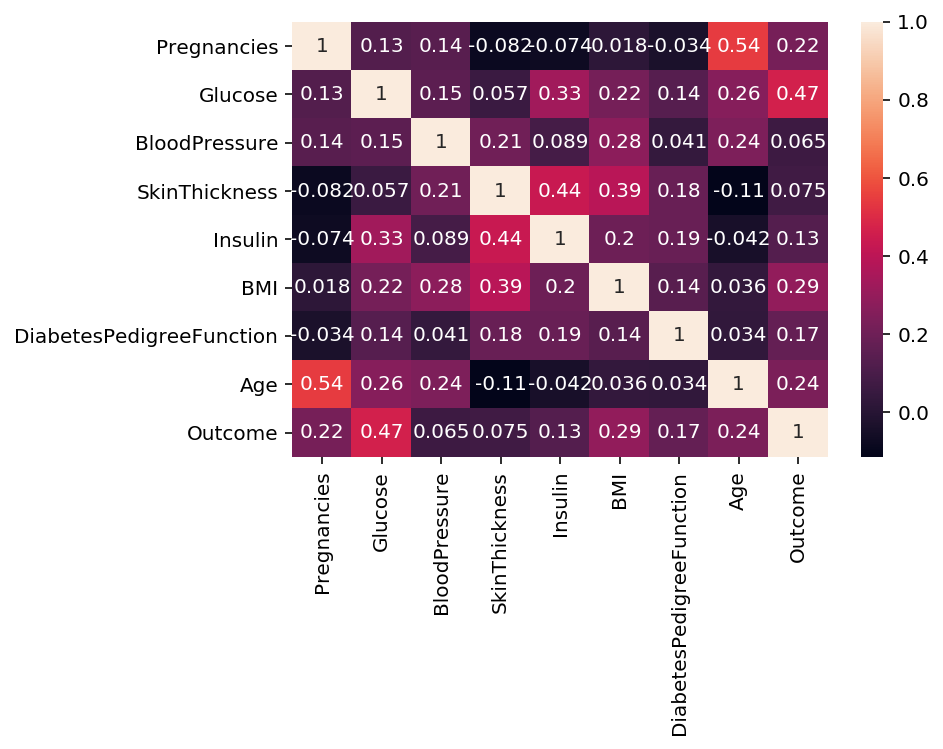

In [10]:
sns.heatmap(diabetes.corr(), annot = True)

In [12]:
X = diabetes.iloc[:, 0:8].values

In [13]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
y = diabetes.iloc[:, 8].values

In [15]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [16]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### STEP #3: TRAIN THE MODEL

In [21]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [23]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [24]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 200)

Train on 614 samples
Epoch 1/200


 32/614 [>.............................] - ETA: 9s - loss: 0.6832 - accuracy: 0.6562

192/614 [========>.....................] - ETA: 1s - loss: 0.6368 - accuracy: 0.6667

448/614 [====================>.........] - ETA: 0s - loss: 0.5786 - accuracy: 0.6964

614/614 [==============================] - 1s 1ms/sample - loss: 0.5648 - accuracy: 0.7134


Epoch 2/200
 32/614 [>.............................] - ETA: 0s - loss: 0.5254 - accuracy: 0.6875

 96/614 [===>..........................] - ETA: 0s - loss: 0.4897 - accuracy: 0.7604

416/614 [===================>..........] - ETA: 0s - loss: 0.4737 - accuracy: 0.7812

614/614 [==============================] - 0s 331us/sample - loss: 0.4692 - accuracy: 0.7785


Epoch 3/200
 32/614 [>.............................] - ETA: 1s - loss: 0.4475 - accuracy: 0.8438

224/614 [=========>....................] - ETA: 0s - loss: 0.4279 - accuracy: 0.8348

576/614 [===========================>..] - ETA: 0s - loss: 0.4692 - accuracy: 0.7847

614/614 [==============================] - 0s 454us/sample - loss: 0.4628 - accuracy: 0.7883


Epoch 4/200
 32/614 [>.............................] - ETA: 0s - loss: 0.6553 - accuracy: 0.5938

192/614 [========>.....................] - ETA: 0s - loss: 0.4848 - accuracy: 0.7292

544/614 [=========================>....] - ETA: 0s - loss: 0.4660 - accuracy: 0.7665

614/614 [==============================] - 0s 321us/sample - loss: 0.4517 - accuracy: 0.7785


Epoch 5/200


 32/614 [>.............................] - ETA: 0s - loss: 0.4171 - accuracy: 0.7500

224/614 [=========>....................] - ETA: 0s - loss: 0.4682 - accuracy: 0.7455

544/614 [=========================>....] - ETA: 0s - loss: 0.4394 - accuracy: 0.7923

614/614 [==============================] - 0s 336us/sample - loss: 0.4422 - accuracy: 0.7899


Epoch 6/200
 32/614 [>.............................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7812

160/614 [======>.......................] - ETA: 0s - loss: 0.4452 - accuracy: 0.7875

512/614 [========================>.....] - ETA: 0s - loss: 0.4302 - accuracy: 0.7871

614/614 [==============================] - 0s 320us/sample - loss: 0.4366 - accuracy: 0.7850


Epoch 7/200


 32/614 [>.............................] - ETA: 0s - loss: 0.4588 - accuracy: 0.7500

160/614 [======>.......................] - ETA: 0s - loss: 0.4544 - accuracy: 0.7875

544/614 [=========================>....] - ETA: 0s - loss: 0.4303 - accuracy: 0.7960

614/614 [==============================] - 0s 315us/sample - loss: 0.4303 - accuracy: 0.8013


Epoch 8/200


 32/614 [>.............................] - ETA: 0s - loss: 0.5647 - accuracy: 0.7812

224/614 [=========>....................] - ETA: 0s - loss: 0.4636 - accuracy: 0.7857

576/614 [===========================>..] - ETA: 0s - loss: 0.4293 - accuracy: 0.7917

614/614 [==============================] - 0s 327us/sample - loss: 0.4224 - accuracy: 0.7964


Epoch 9/200


 32/614 [>.............................] - ETA: 0s - loss: 0.3274 - accuracy: 0.7812

 64/614 [==>...........................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8281

288/614 [=============>................] - ETA: 0s - loss: 0.4085 - accuracy: 0.8056

576/614 [===========================>..] - ETA: 0s - loss: 0.4333 - accuracy: 0.7969

614/614 [==============================] - 0s 470us/sample - loss: 0.4326 - accuracy: 0.7964


Epoch 10/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3281 - accuracy: 0.8750

320/614 [==============>...............] - ETA: 0s - loss: 0.4213 - accuracy: 0.7875

614/614 [==============================] - 0s 230us/sample - loss: 0.4176 - accuracy: 0.7932


Epoch 11/200


 32/614 [>.............................] - ETA: 0s - loss: 0.3563 - accuracy: 0.8438

352/614 [================>.............] - ETA: 0s - loss: 0.4076 - accuracy: 0.8097

614/614 [==============================] - 0s 334us/sample - loss: 0.4148 - accuracy: 0.7932


Epoch 12/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8438

384/614 [=================>............] - ETA: 0s - loss: 0.4088 - accuracy: 0.8073

614/614 [==============================] - 0s 284us/sample - loss: 0.4111 - accuracy: 0.8062


Epoch 13/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8750

 96/614 [===>..........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7812

416/614 [===================>..........]

 - ETA: 0s - loss: 0.4125 - accuracy: 0.8005

614/614 [==============================] - 0s 322us/sample - loss: 0.4237 - accuracy: 0.8013


Epoch 14/200


 32/614 [>.............................] - ETA: 0s - loss: 0.6015 - accuracy: 0.6875

 96/614 [===>..........................] - ETA: 0s - loss: 0.4687 - accuracy: 0.7812

416/614 [===================>..........] - ETA: 0s - loss: 0.4170 - accuracy: 0.8029

480/614 [======================>.......] - ETA: 0s - loss: 0.4057 - accuracy: 0.8146

576/614 [===========================>..] - ETA: 0s - loss: 0.4024 - accuracy: 0.8177

614/614 [==============================] - 0s 454us/sample - loss: 0.4010 - accuracy: 0.8192


Epoch 15/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8750

224/614 [=========>....................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8170

576/614 [===========================>..] - ETA: 0s - loss: 0.4019 - accuracy: 0.8125

614/614 [==============================] - 0s 324us/sample - loss: 0.3967 - accuracy: 0.8176


Epoch 16/200


 32/614 [>.............................] - ETA: 0s - loss: 0.2392 - accuracy: 0.9062

256/614 [===========>..................] - ETA: 0s - loss: 0.4166 - accuracy: 0.7891

416/614 [===================>..........] - ETA: 0s - loss: 0.4076 - accuracy: 0.7861

576/614 [===========================>..] - ETA: 0s - loss: 0.3984 - accuracy: 0.8056

614/614 [==============================] - 0s 495us/sample - loss: 0.4000 - accuracy: 0.8013


Epoch 17/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2731 - accuracy: 0.9062

160/614 [======>.......................] - ETA: 0s - loss: 0.3865 - accuracy: 0.8438

384/614 [=================>............] - ETA: 0s - loss: 0.3641 - accuracy: 0.8281

448/614 [====================>.........] - ETA: 0s - loss: 0.3906 - accuracy: 0.8147

614/614 [==============================] - 0s 359us/sample - loss: 0.3940 - accuracy: 0.8192


Epoch 18/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3206 - accuracy: 0.7812

 64/614 [==>...........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8281

256/614 [===========>..................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8438

576/614 [===========================>..] - ETA: 0s - loss: 0.4001 - accuracy: 0.8125

614/614 [==============================] - 0s 442us/sample - loss: 0.3902 - accuracy: 0.8208


Epoch 19/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8438

224/614 [=========>....................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8393

576/614 [===========================>..] - ETA: 0s - loss: 0.3727 - accuracy: 0.8316

614/614 [==============================] - 0s 323us/sample - loss: 0.3883 - accuracy: 0.8241


Epoch 20/200


 32/614 [>.............................] - ETA: 0s - loss: 0.4545 - accuracy: 0.7500

192/614 [========>.....................] - ETA: 0s - loss: 0.4610 - accuracy: 0.7917

576/614 [===========================>..] - ETA: 0s - loss: 0.3966 - accuracy: 0.8177

614/614 [==============================] - 0s 324us/sample - loss: 0.3893 - accuracy: 0.8257


Epoch 21/200


 32/614 [>.............................] - ETA: 0s - loss: 0.2979 - accuracy: 0.9062

320/614 [==============>...............] - ETA: 0s - loss: 0.3850 - accuracy: 0.8344

614/614 [==============================] - 0s 214us/sample - loss: 0.3791 - accuracy: 0.8306


Epoch 22/200
 32/614 [>.............................] - ETA: 1s - loss: 0.4713 - accuracy: 0.7812

352/614 [================>.............] - ETA: 0s - loss: 0.3773 - accuracy: 0.8324

384/614 [=================>............] - ETA: 0s - loss: 0.3695 - accuracy: 0.8333

614/614 [==============================] - 0s 321us/sample - loss: 0.3738 - accuracy: 0.8192


Epoch 23/200

 32/614 [>.............................] - ETA: 0s - loss: 0.1875 - accuracy: 0.9375

 96/614 [===>..........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.8542

512/614 [========================>.....] - ETA: 0s - loss: 0.3777 - accuracy: 0.8203

614/614 [==============================] - 0s 280us/sample - loss: 0.3815 - accuracy: 0.8160


Epoch 24/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8750

256/614 [===========>..................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8398

608/614 [============================>.] - ETA: 0s - loss: 0.3666 - accuracy: 0.8240

614/614 [==============================] - 0s 305us/sample - loss: 0.3663 - accuracy: 0.8225


Epoch 25/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3499 - accuracy: 0.8125

320/614 [==============>...............] - ETA: 0s - loss: 0.3738 - accuracy: 0.8219

614/614 [==============================] - 0s 215us/sample - loss: 0.3729 - accuracy: 0.8225


Epoch 26/200
 32/614 [>.............................] - ETA: 0s - loss: 0.4556 - accuracy: 0.7500

 64/614 [==>...........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.8125

480/614 [======================>.......] - ETA: 0s - loss: 0.3588 - accuracy: 0.8438

614/614 [==============================] - 0s 293us/sample - loss: 0.3663 - accuracy: 0.8355


Epoch 27/200
 32/614 [>.............................] - ETA: 0s - loss: 0.5053 - accuracy: 0.8125

224/614 [=========>....................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8929

614/614 [==============================] - 0s 204us/sample - loss: 0.3538 - accuracy: 0.8404


Epoch 28/200


 32/614 [>.............................] - ETA: 0s - loss: 0.5037 - accuracy: 0.6562

352/614 [================>.............] - ETA: 0s - loss: 0.4065 - accuracy: 0.7955

614/614 [==============================] - 0s 225us/sample - loss: 0.3730 - accuracy: 0.8127


Epoch 29/200


 32/614 [>.............................] - ETA: 0s - loss: 0.3517 - accuracy: 0.8125

 64/614 [==>...........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.8125

480/614 [======================>.......] - ETA: 0s - loss: 0.3320 - accuracy: 0.8417

614/614 [==============================] - 0s 300us/sample - loss: 0.3576 - accuracy: 0.8225


Epoch 30/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3662 - accuracy: 0.8750

192/614 [========>.....................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8906

608/614 [============================>.] - ETA: 0s - loss: 0.3353 - accuracy: 0.8487

614/614 [==============================] - 0s 292us/sample - loss: 0.3344 - accuracy: 0.8502


Epoch 31/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2800 - accuracy: 0.9062

320/614 [==============>...............] - ETA: 0s - loss: 0.3234 - accuracy: 0.8500

576/614 [===========================>..] - ETA: 0s - loss: 0.3437 - accuracy: 0.8316

614/614 [==============================] - 0s 255us/sample - loss: 0.3476 - accuracy: 0.8306


Epoch 32/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3148 - accuracy: 0.8438

480/614 [======================>.......] - ETA: 0s - loss: 0.3198 - accuracy: 0.8562

614/614 [==============================] - 0s 252us/sample - loss: 0.3408 - accuracy: 0.8420


Epoch 33/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3796 - accuracy: 0.8750

224/614 [=========>....................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8438

614/614 [==============================] - 0s 200us/sample - loss: 0.3434 - accuracy: 0.8355


Epoch 34/200
 32/614 [>.............................] - ETA: 1s - loss: 0.4846 - accuracy: 0.7500

416/614 [===================>..........] - ETA: 0s - loss: 0.3361 - accuracy: 0.8510

614/614 [==============================] - 0s 296us/sample - loss: 0.3284 - accuracy: 0.8469


Epoch 35/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8125

160/614 [======>.......................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8687

576/614 [===========================>..] - ETA: 0s - loss: 0.3286 - accuracy: 0.8472

614/614 [==============================] - 0s 297us/sample - loss: 0.3216 - accuracy: 0.8518


Epoch 36/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2714 - accuracy: 0.9375

192/614 [========>.....................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8906

576/614 [===========================>..] - ETA: 0s - loss: 0.3167 - accuracy: 0.8611

614/614 [==============================] - 0s 323us/sample - loss: 0.3345 - accuracy: 0.8518


Epoch 37/200


 32/614 [>.............................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8125

288/614 [=============>................] - ETA: 0s - loss: 0.3398 - accuracy: 0.8542

614/614 [==============================] - 0s 232us/sample - loss: 0.3247 - accuracy: 0.8648


Epoch 38/200


 32/614 [>.............................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8438

416/614 [===================>..........] - ETA: 0s - loss: 0.2952 - accuracy: 0.8750

614/614 [==============================] - 0s 281us/sample - loss: 0.3085 - accuracy: 0.8713


Epoch 39/200
 32/614 [>.............................] - ETA: 0s - loss: 0.4267 - accuracy: 0.8438

192/614 [========>.....................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8802

576/614 [===========================>..] - ETA: 0s - loss: 0.2970 - accuracy: 0.8611

614/614 [==============================] - 0s 295us/sample - loss: 0.3060 - accuracy: 0.8534


Epoch 40/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8438

352/614 [================>.............] - ETA: 0s - loss: 0.3388 - accuracy: 0.8438

614/614 [==============================] - 0s 202us/sample - loss: 0.3240 - accuracy: 0.8534


Epoch 41/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2734 - accuracy: 0.9062

 96/614 [===>..........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8750

512/614 [========================>.....] - ETA: 0s - loss: 0.3174 - accuracy: 0.8672

614/614 [==============================] - 0s 306us/sample - loss: 0.3063 - accuracy: 0.8697


Epoch 42/200
 32/614 [>.............................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8125

224/614 [=========>....................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8616

544/614 [=========================>....] - ETA: 0s - loss: 0.2985 - accuracy: 0.8658

614/614 [==============================] - 0s 294us/sample - loss: 0.3033 - accuracy: 0.8632


Epoch 43/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2419 - accuracy: 0.9062

320/614 [==============>...............] - ETA: 0s - loss: 0.2649 - accuracy: 0.8875

614/614 [==============================] - 0s 223us/sample - loss: 0.2942 - accuracy: 0.8713


Epoch 44/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8438

 64/614 [==>...........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8594

448/614 [====================>.........] - ETA: 0s - loss: 0.3228 - accuracy: 0.8482

614/614 [==============================] - 0s 303us/sample - loss: 0.2911 - accuracy: 0.8681


Epoch 45/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8750

160/614 [======>.......................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8625

544/614 [=========================>....] - ETA: 0s - loss: 0.2901 - accuracy: 0.8750

614/614 [==============================] - 0s 296us/sample - loss: 0.2909 - accuracy: 0.8713


Epoch 46/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8750

288/614 [=============>................] - ETA: 0s - loss: 0.2949 - accuracy: 0.8854

614/614 [==============================] - 0s 204us/sample - loss: 0.2877 - accuracy: 0.8893


Epoch 47/200
 32/614 [>.............................] - ETA: 1s - loss: 0.1615 - accuracy: 0.9375

448/614 [====================>.........] - ETA: 0s - loss: 0.2499 - accuracy: 0.8795

614/614 [==============================] - 0s 294us/sample - loss: 0.2683 - accuracy: 0.8730


Epoch 48/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1807 - accuracy: 0.9375

192/614 [========>.....................] - ETA: 0s - loss: 0.2716 - accuracy: 0.8906

576/614 [===========================>..] - ETA: 0s - loss: 0.2738 - accuracy: 0.8889

608/614 [============================>.] - ETA: 0s - loss: 0.2704 - accuracy: 0.8898

614/614 [==============================] - 0s 301us/sample - loss: 0.2704 - accuracy: 0.8909


Epoch 49/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1486 - accuracy: 1.0000

320/614 [==============>...............] - ETA: 0s - loss: 0.2679 - accuracy: 0.8750

614/614 [==============================] - 0s 206us/sample - loss: 0.2707 - accuracy: 0.8860


Epoch 50/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2891 - accuracy: 0.8750

 96/614 [===>..........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.8542

512/614 [========================>.....] - ETA: 0s - loss: 0.2714 - accuracy: 0.8750

614/614 [==============================] - 0s 295us/sample - loss: 0.2736 - accuracy: 0.8779


Epoch 51/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8438

224/614 [=========>....................] - ETA: 0s - loss: 0.2472 - accuracy: 0.8884

614/614 [==============================] - 0s 217us/sample - loss: 0.2821 - accuracy: 0.8746


Epoch 52/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1886 - accuracy: 0.9375

416/614 [===================>..........] - ETA: 0s - loss: 0.2194 - accuracy: 0.9231

614/614 [==============================] - 0s 289us/sample - loss: 0.2576 - accuracy: 0.8974


Epoch 53/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2528 - accuracy: 0.9062

128/614 [=====>........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9219

512/614 [========================>.....] - ETA: 0s - loss: 0.2307 - accuracy: 0.9043

544/614 [=========================>....] - ETA: 0s - loss: 0.2474 - accuracy: 0.8989

614/614 [==============================] - 0s 299us/sample - loss: 0.2496 - accuracy: 0.8974


Epoch 54/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3364 - accuracy: 0.8750

256/614 [===========>..................] - ETA: 0s - loss: 0.2398 - accuracy: 0.9102

512/614 [========================>.....] - ETA: 0s - loss: 0.2501 - accuracy: 0.9004

614/614 [==============================] - 0s 302us/sample - loss: 0.2547 - accuracy: 0.9007


Epoch 55/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8750

352/614 [================>.............] - ETA: 0s - loss: 0.2392 - accuracy: 0.9034

614/614 [==============================] - 0s 223us/sample - loss: 0.2544 - accuracy: 0.8990


Epoch 56/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2684 - accuracy: 0.8438

 64/614 [==>...........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.7812

416/614 [===================>..........] - ETA: 0s - loss: 0.2578 - accuracy: 0.8942

480/614 [======================>.......] - ETA: 0s - loss: 0.2442 - accuracy: 0.9021

614/614 [==============================] - 0s 304us/sample - loss: 0.2525 - accuracy: 0.8990


Epoch 57/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1242 - accuracy: 0.9688

192/614 [========>.....................] - ETA: 0s - loss: 0.1985 - accuracy: 0.9323

576/614 [===========================>..] - ETA: 0s - loss: 0.2211 - accuracy: 0.9045

608/614 [============================>.] - ETA: 0s - loss: 0.2266 - accuracy: 0.9013

614/614 [==============================] - 0s 303us/sample - loss: 0.2266 - accuracy: 0.9007


Epoch 58/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1377 - accuracy: 1.0000

288/614 [=============>................] - ETA: 0s - loss: 0.2318 - accuracy: 0.9028

614/614 [==============================] - 0s 217us/sample - loss: 0.2225 - accuracy: 0.9055


Epoch 59/200


 32/614 [>.............................] - ETA: 0s - loss: 0.4560 - accuracy: 0.8438

384/614 [=================>............] - ETA: 0s - loss: 0.2625 - accuracy: 0.9010

614/614 [==============================] - 0s 295us/sample - loss: 0.2416 - accuracy: 0.9088


Epoch 60/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1667 - accuracy: 0.9062

 96/614 [===>..........................] - ETA: 0s - loss: 0.2266 - accuracy: 0.8854

352/614 [================>.............] - ETA: 0s - loss: 0.2295 - accuracy: 0.9034

480/614 [======================>.......] - ETA: 0s - loss: 0.2318 - accuracy: 0.8958

614/614 [==============================] - 0s 319us/sample - loss: 0.2424 - accuracy: 0.8909


Epoch 61/200


 32/614 [>.............................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8750

128/614 [=====>........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8750

448/614 [====================>.........] - ETA: 0s - loss: 0.2270 - accuracy: 0.9085

512/614 [========================>.....] - ETA: 0s - loss: 0.2236 - accuracy: 0.9102



614/614 [==============================] - 0s 328us/sample - loss: 0.2296 - accuracy: 0.9121


Epoch 62/200


 32/614 [>.............................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438

192/614 [========>.....................] - ETA: 0s - loss: 0.2032 - accuracy: 0.9167

576/614 [===========================>..] - ETA: 0s - loss: 0.2256 - accuracy: 0.9045

614/614 [==============================] - 0s 272us/sample - loss: 0.2269 - accuracy: 0.9039


Epoch 63/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1579 - accuracy: 0.9375

256/614 [===========>..................] - ETA: 0s - loss: 0.2087 - accuracy: 0.9297

512/614 [========================>.....] - ETA: 0s - loss: 0.2316 - accuracy: 0.9141

614/614 [==============================] - 0s 314us/sample - loss: 0.2306 - accuracy: 0.9104


Epoch 64/200


 32/614 [>.............................] - ETA: 0s - loss: 0.2038 - accuracy: 0.9062

224/614 [=========>....................] - ETA: 0s - loss: 0.2079 - accuracy: 0.9196

384/614 [=================>............] - ETA: 0s - loss: 0.1945 - accuracy: 0.9245

608/614 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9095



614/614 [==============================] - 0s 328us/sample - loss: 0.2158 - accuracy: 0.9104


Epoch 65/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1721 - accuracy: 0.9062

288/614 [=============>................] - ETA: 0s - loss: 0.2031 - accuracy: 0.9201

576/614 [===========================>..] - ETA: 0s - loss: 0.2086 - accuracy: 0.9201

614/614 [==============================] - 0s 246us/sample - loss: 0.2157 - accuracy: 0.9186


Epoch 66/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1858 - accuracy: 0.9375

288/614 [=============>................] - ETA: 0s - loss: 0.1837 - accuracy: 0.9410

416/614 [===================>..........] - ETA: 0s - loss: 0.1988 - accuracy: 0.9279

614/614 [==============================] - 0s 274us/sample - loss: 0.2184 - accuracy: 0.9121


Epoch 67/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1979 - accuracy: 0.9062



 96/614 [===>..........................] - ETA: 0s - loss: 0.2098 - accuracy: 0.8958

416/614 [===================>..........] - ETA: 0s - loss: 0.1915 - accuracy: 0.9135

480/614 [======================>.......] - ETA: 0s - loss: 0.1857 - accuracy: 0.9229

614/614 [==============================] - 0s 318us/sample - loss: 0.1921 - accuracy: 0.9153


Epoch 68/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1508 - accuracy: 0.9688

160/614 [======>.......................] - ETA: 0s - loss: 0.1855 - accuracy: 0.9375

512/614 [========================>.....] - ETA: 0s - loss: 0.2206 - accuracy: 0.9062

576/614 [===========================>..] - ETA: 0s - loss: 0.2261 - accuracy: 0.9010

614/614 [==============================] - 0s 300us/sample - loss: 0.2243 - accuracy: 0.9039


Epoch 69/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8125

224/614 [=========>....................] - ETA: 0s - loss: 0.2009 - accuracy: 0.9107

416/614 [===================>..........] - ETA: 0s - loss: 0.1898 - accuracy: 0.9159

576/614 [===========================>..] - ETA: 0s - loss: 0.1960 - accuracy: 0.9201

614/614 [==============================] - 0s 334us/sample - loss: 0.2042 - accuracy: 0.9137


Epoch 70/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0665 - accuracy: 1.0000

256/614 [===========>..................] - ETA: 0s - loss: 0.1628 - accuracy: 0.9492

576/614 [===========================>..] - ETA: 0s - loss: 0.2073 - accuracy: 0.9080

614/614 [==============================] - 0s 283us/sample - loss: 0.1990 - accuracy: 0.9137


Epoch 71/200


 32/614 [>.............................] - ETA: 0s - loss: 0.2267 - accuracy: 0.9375

352/614 [================>.............] - ETA: 0s - loss: 0.2139 - accuracy: 0.9205

614/614 [==============================] - 0s 245us/sample - loss: 0.1995 - accuracy: 0.9251


Epoch 72/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1815 - accuracy: 0.9688

320/614 [==============>...............] - ETA: 0s - loss: 0.1894 - accuracy: 0.9312

416/614 [===================>..........] - ETA: 0s - loss: 0.2008 - accuracy: 0.9279



614/614 [==============================] - 0s 325us/sample - loss: 0.2040 - accuracy: 0.9218


Epoch 73/200
 32/614 [>.............................] - ETA: 0s - loss: 0.3212 - accuracy: 0.7812

320/614 [==============>...............] - ETA: 0s - loss: 0.2247 - accuracy: 0.9031

384/614 [=================>............] - ETA: 0s - loss: 0.2197 - accuracy: 0.9115

614/614 [==============================] - 0s 312us/sample - loss: 0.2143 - accuracy: 0.9169


Epoch 74/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0966 - accuracy: 0.9688

128/614 [=====>........................] - ETA: 0s - loss: 0.1426 - accuracy: 0.9453

288/614 [=============>................] - ETA: 0s - loss: 0.1628 - accuracy: 0.9375

480/614 [======================>.......] - ETA: 0s - loss: 0.1590 - accuracy: 0.9458

614/614 [==============================] - 0s 322us/sample - loss: 0.1664 - accuracy: 0.9430


Epoch 75/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9375

192/614 [========>.....................] - ETA: 0s - loss: 0.1618 - accuracy: 0.9583

448/614 [====================>.........] - ETA: 0s - loss: 0.1688 - accuracy: 0.9531

614/614 [==============================] - 0s 295us/sample - loss: 0.1787 - accuracy: 0.9397


Epoch 76/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1481 - accuracy: 0.9688

 96/614 [===>..........................] - ETA: 0s - loss: 0.1331 - accuracy: 0.9688

448/614 [====================>.........] - ETA: 0s - loss: 0.1914 - accuracy: 0.9219

614/614 [==============================] - 0s 311us/sample - loss: 0.1855 - accuracy: 0.9267


Epoch 77/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1990 - accuracy: 0.9062

160/614 [======>.......................] - ETA: 0s - loss: 0.1954 - accuracy: 0.9062

512/614 [========================>.....] - ETA: 0s - loss: 0.1873 - accuracy: 0.9336

544/614 [=========================>....] - ETA: 0s - loss: 0.1937 - accuracy: 0.9338

614/614 [==============================] - 0s 314us/sample - loss: 0.1907 - accuracy: 0.9332


Epoch 78/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1858 - accuracy: 0.9375

224/614 [=========>....................] - ETA: 0s - loss: 0.2161 - accuracy: 0.9330

480/614 [======================>.......] - ETA: 0s - loss: 0.1846 - accuracy: 0.9396

608/614 [============================>.] - ETA: 0s - loss: 0.1856 - accuracy: 0.9359

614/614 [==============================] - 0s 306us/sample - loss: 0.1864 - accuracy: 0.9349


Epoch 79/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0991 - accuracy: 1.0000

288/614 [=============>................] - ETA: 0s - loss: 0.1513 - accuracy: 0.9549

608/614 [============================>.] - ETA: 0s - loss: 0.1723 - accuracy: 0.9342

614/614 [==============================] - 0s 242us/sample - loss: 0.1719 - accuracy: 0.9349


Epoch 80/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1346 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.1654 - accuracy: 0.9432

448/614 [====================>.........] - ETA: 0s - loss: 0.1645 - accuracy: 0.9420

614/614 [==============================] - 0s 288us/sample - loss: 0.1686 - accuracy: 0.9332


Epoch 81/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1975 - accuracy: 0.9375

 96/614 [===>..........................] - ETA: 0s - loss: 0.1707 - accuracy: 0.9271



416/614 [===================>..........] - ETA: 0s - loss: 0.1696 - accuracy: 0.9327

512/614 [========================>.....] - ETA: 0s - loss: 0.1735 - accuracy: 0.9336

614/614 [==============================] - 0s 307us/sample - loss: 0.1736 - accuracy: 0.9365


Epoch 82/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1037 - accuracy: 0.9688

160/614 [======>.......................] - ETA: 0s - loss: 0.1690 - accuracy: 0.9375

512/614 [========================>.....] - ETA: 0s - loss: 0.1785 - accuracy: 0.9277

614/614 [==============================] - 0s 330us/sample - loss: 0.1722 - accuracy: 0.9332


Epoch 83/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0874 - accuracy: 0.9688

192/614 [========>.....................] - ETA: 0s - loss: 0.1318 - accuracy: 0.9375

384/614 [=================>............] - ETA: 0s - loss: 0.1539 - accuracy: 0.9349

576/614 [===========================>..] - ETA: 0s - loss: 0.1705 - accuracy: 0.9271

614/614 [==============================] - 0s 285us/sample - loss: 0.1814 - accuracy: 0.9251


Epoch 84/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1667 - accuracy: 0.9688

224/614 [=========>....................] - ETA: 0s - loss: 0.1468 - accuracy: 0.9464

576/614 [===========================>..] - ETA: 0s - loss: 0.1513 - accuracy: 0.9444

608/614 [============================>.] - ETA: 0s - loss: 0.1511 - accuracy: 0.9457

614/614 [==============================] - 0s 313us/sample - loss: 0.1503 - accuracy: 0.9463


Epoch 85/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0976 - accuracy: 1.0000

320/614 [==============>...............] - ETA: 0s - loss: 0.1648 - accuracy: 0.9344

614/614 [==============================] - 0s 225us/sample - loss: 0.1522 - accuracy: 0.9446


Epoch 86/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1960 - accuracy: 0.9062

416/614 [===================>..........] - ETA: 0s - loss: 0.1774 - accuracy: 0.9399

614/614 [==============================] - 0s 299us/sample - loss: 0.1770 - accuracy: 0.9414


Epoch 87/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1172 - accuracy: 0.9375

128/614 [=====>........................] - ETA: 0s - loss: 0.1156 - accuracy: 0.9609

512/614 [========================>.....] - ETA: 0s - loss: 0.1545 - accuracy: 0.9434

576/614 [===========================>..] - ETA: 0s - loss: 0.1531 - accuracy: 0.9427

614/614 [==============================] - 0s 293us/sample - loss: 0.1516 - accuracy: 0.9414


Epoch 88/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1854 - accuracy: 0.9375

256/614 [===========>..................] - ETA: 0s - loss: 0.1639 - accuracy: 0.9492

576/614 [===========================>..] - ETA: 0s - loss: 0.1630 - accuracy: 0.9375

614/614 [==============================] - 0s 306us/sample - loss: 0.1610 - accuracy: 0.9381


Epoch 89/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1360 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.1178 - accuracy: 0.9716

614/614 [==============================] - 0s 241us/sample - loss: 0.1420 - accuracy: 0.9544


Epoch 90/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1810 - accuracy: 0.9375

416/614 [===================>..........] - ETA: 0s - loss: 0.1355 - accuracy: 0.9495

614/614 [==============================] - 0s 287us/sample - loss: 0.1473 - accuracy: 0.9397


Epoch 91/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1427 - accuracy: 0.9688

160/614 [======>.......................] - ETA: 0s - loss: 0.1084 - accuracy: 0.9688

480/614 [======================>.......] - ETA: 0s - loss: 0.1241 - accuracy: 0.9667

576/614 [===========================>..] - ETA: 0s - loss: 0.1303 - accuracy: 0.9601

614/614 [==============================] - 0s 305us/sample - loss: 0.1417 - accuracy: 0.9528


Epoch 92/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1039 - accuracy: 1.0000

224/614 [=========>....................] - ETA: 0s - loss: 0.1130 - accuracy: 0.9732

544/614 [=========================>....] - ETA: 0s - loss: 0.1170 - accuracy: 0.9596

614/614 [==============================] - 0s 295us/sample - loss: 0.1243 - accuracy: 0.9577


Epoch 93/200


 32/614 [>.............................] - ETA: 0s - loss: 0.3242 - accuracy: 0.8438

384/614 [=================>............] - ETA: 0s - loss: 0.1307 - accuracy: 0.9479

614/614 [==============================] - 0s 211us/sample - loss: 0.1434 - accuracy: 0.9414


Epoch 94/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0957 - accuracy: 0.9688



160/614 [======>.......................] - ETA: 0s - loss: 0.1384 - accuracy: 0.9625

352/614 [================>.............] - ETA: 0s - loss: 0.1460 - accuracy: 0.9489

544/614 [=========================>....] - ETA: 0s - loss: 0.1344 - accuracy: 0.9559

614/614 [==============================] - 0s 299us/sample - loss: 0.1346 - accuracy: 0.9544


Epoch 95/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1406 - accuracy: 0.9375

224/614 [=========>....................] - ETA: 0s - loss: 0.1122 - accuracy: 0.9643

448/614 [====================>.........] - ETA: 0s - loss: 0.1308 - accuracy: 0.9531

614/614 [==============================] - 0s 454us/sample - loss: 0.1343 - accuracy: 0.9495


Epoch 96/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1287 - accuracy: 0.9375

 96/614 [===>..........................] - ETA: 0s - loss: 0.0907 - accuracy: 0.9688

288/614 [=============>................] - ETA: 0s - loss: 0.1063 - accuracy: 0.9583

480/614 [======================>.......] - ETA: 0s - loss: 0.1163 - accuracy: 0.9604

614/614 [==============================] - 0s 542us/sample - loss: 0.1237 - accuracy: 0.9577


Epoch 97/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1484 - accuracy: 0.9062

160/614 [======>.......................] - ETA: 0s - loss: 0.1191 - accuracy: 0.9438

416/614 [===================>..........] - ETA: 0s - loss: 0.1270 - accuracy: 0.9519

480/614 [======================>.......] - ETA: 0s - loss: 0.1219 - accuracy: 0.9542

614/614 [==============================] - 0s 321us/sample - loss: 0.1237 - accuracy: 0.9528


Epoch 98/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0866 - accuracy: 1.0000

128/614 [=====>........................] - ETA: 0s - loss: 0.1234 - accuracy: 0.9688

448/614 [====================>.........] - ETA: 0s - loss: 0.1332 - accuracy: 0.9509

544/614 [=========================>....] - ETA: 0s - loss: 0.1350 - accuracy: 0.9522

614/614 [==============================] - 0s 297us/sample - loss: 0.1309 - accuracy: 0.9544


Epoch 99/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1397 - accuracy: 0.9375

224/614 [=========>....................] - ETA: 0s - loss: 0.1573 - accuracy: 0.9375

512/614 [========================>.....] - ETA: 0s - loss: 0.1328 - accuracy: 0.9492

614/614 [==============================] - 0s 293us/sample - loss: 0.1238 - accuracy: 0.9528


Epoch 100/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0615 - accuracy: 1.0000

256/614 [===========>..................] - ETA: 0s - loss: 0.1401 - accuracy: 0.9453

448/614 [====================>.........] - ETA: 0s - loss: 0.1464 - accuracy: 0.9464

614/614 [==============================] - 0s 274us/sample - loss: 0.1430 - accuracy: 0.9511


Epoch 101/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0413 - accuracy: 1.0000

256/614 [===========>..................] - ETA: 0s - loss: 0.0989 - accuracy: 0.9727

448/614 [====================>.........] - ETA: 0s - loss: 0.1167 - accuracy: 0.9598

614/614 [==============================] - 0s 276us/sample - loss: 0.1176 - accuracy: 0.9593


Epoch 102/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0626 - accuracy: 1.0000

160/614 [======>.......................] - ETA: 0s - loss: 0.0868 - accuracy: 0.9812

352/614 [================>.............] - ETA: 0s - loss: 0.1076 - accuracy: 0.9773

544/614 [=========================>....] - ETA: 0s - loss: 0.1107 - accuracy: 0.9743

614/614 [==============================] - 0s 295us/sample - loss: 0.1081 - accuracy: 0.9756


Epoch 103/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0633 - accuracy: 1.0000

192/614 [========>.....................] - ETA: 0s - loss: 0.0985 - accuracy: 0.9792

512/614 [========================>.....] - ETA: 0s - loss: 0.1068 - accuracy: 0.9707

576/614 [===========================>..] - ETA: 0s - loss: 0.1041 - accuracy: 0.9722

614/614 [==============================] - 0s 300us/sample - loss: 0.1042 - accuracy: 0.9739


Epoch 104/200
 32/614 [>.............................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8750

256/614 [===========>..................] - ETA: 0s - loss: 0.1247 - accuracy: 0.9453

544/614 [=========================>....] - ETA: 0s - loss: 0.1206 - accuracy: 0.9504



614/614 [==============================] - 0s 308us/sample - loss: 0.1196 - accuracy: 0.9528


Epoch 105/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1178 - accuracy: 0.9688

320/614 [==============>...............] - ETA: 0s - loss: 0.1428 - accuracy: 0.9469

614/614 [==============================] - 0s 221us/sample - loss: 0.1186 - accuracy: 0.9609


Epoch 106/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0670 - accuracy: 1.0000

 96/614 [===>..........................] - ETA: 0s - loss: 0.0880 - accuracy: 0.9792

416/614 [===================>..........] - ETA: 0s - loss: 0.0963 - accuracy: 0.9688

614/614 [==============================] - 0s 335us/sample - loss: 0.1123 - accuracy: 0.9625


Epoch 107/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0851 - accuracy: 0.9375

192/614 [========>.....................] - ETA: 0s - loss: 0.1022 - accuracy: 0.9583

384/614 [=================>............] - ETA: 0s - loss: 0.1149 - accuracy: 0.9557

544/614 [=========================>....] - ETA: 0s - loss: 0.1225 - accuracy: 0.9449

614/614 [==============================] - 0s 298us/sample - loss: 0.1299 - accuracy: 0.9414


Epoch 108/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1551 - accuracy: 0.9375

160/614 [======>.......................] - ETA: 0s - loss: 0.1236 - accuracy: 0.9563

480/614 [======================>.......] - ETA: 0s - loss: 0.1031 - accuracy: 0.9646

544/614 [=========================>....] - ETA: 0s - loss: 0.1008 - accuracy: 0.9669

614/614 [==============================] - 0s 324us/sample - loss: 0.1079 - accuracy: 0.9609


Epoch 109/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0626 - accuracy: 1.0000

224/614 [=========>....................] - ETA: 0s - loss: 0.0851 - accuracy: 0.9777

352/614 [================>.............] - ETA: 0s - loss: 0.0982 - accuracy: 0.9716

480/614 [======================>.......] - ETA: 0s - loss: 0.0942 - accuracy: 0.9708

608/614 [============================>.] - ETA: 0s - loss: 0.1092 - accuracy: 0.9605

614/614 [==============================] - 0s 394us/sample - loss: 0.1085 - accuracy: 0.9609


Epoch 110/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0700 - accuracy: 0.9688

256/614 [===========>..................] - ETA: 0s - loss: 0.1345 - accuracy: 0.9570

480/614 [======================>.......] - ETA: 0s - loss: 0.1183 - accuracy: 0.9604

614/614 [==============================] - 0s 243us/sample - loss: 0.1209 - accuracy: 0.9593


Epoch 111/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0670 - accuracy: 1.0000

128/614 [=====>........................] - ETA: 0s - loss: 0.0775 - accuracy: 0.9844

416/614 [===================>..........] - ETA: 0s - loss: 0.1108 - accuracy: 0.9591

544/614 [=========================>....] - ETA: 0s - loss: 0.1103 - accuracy: 0.9596

614/614 [==============================] - 0s 302us/sample - loss: 0.1101 - accuracy: 0.9593


Epoch 112/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1544 - accuracy: 0.9062

160/614 [======>.......................] - ETA: 0s - loss: 0.1162 - accuracy: 0.9563

384/614 [=================>............] - ETA: 0s - loss: 0.1297 - accuracy: 0.9609

512/614 [========================>.....] - ETA: 0s - loss: 0.1309 - accuracy: 0.9590

614/614 [==============================] - 0s 317us/sample - loss: 0.1300 - accuracy: 0.9577


Epoch 113/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0480 - accuracy: 0.9688

192/614 [========>.....................] - ETA: 0s - loss: 0.0836 - accuracy: 0.9635

448/614 [====================>.........] - ETA: 0s - loss: 0.1079 - accuracy: 0.9509

544/614 [=========================>....] - ETA: 0s - loss: 0.1097 - accuracy: 0.9540

614/614 [==============================] - 0s 328us/sample - loss: 0.1148 - accuracy: 0.9511


Epoch 114/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0771 - accuracy: 0.9375

224/614 [=========>....................] - ETA: 0s - loss: 0.0917 - accuracy: 0.9598

576/614 [===========================>..] - ETA: 0s - loss: 0.1145 - accuracy: 0.9583

608/614 [============================>.] - ETA: 0s - loss: 0.1164 - accuracy: 0.9572

614/614 [==============================] - 0s 296us/sample - loss: 0.1222 - accuracy: 0.9560


Epoch 115/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0552 - accuracy: 1.0000



320/614 [==============>...............] - ETA: 0s - loss: 0.0895 - accuracy: 0.9844

608/614 [============================>.] - ETA: 0s - loss: 0.1236 - accuracy: 0.9671

614/614 [==============================] - 0s 310us/sample - loss: 0.1235 - accuracy: 0.9674


Epoch 116/200


 32/614 [>.............................] - ETA: 0s - loss: 0.2121 - accuracy: 0.9375

320/614 [==============>...............] - ETA: 0s - loss: 0.1363 - accuracy: 0.9531

608/614 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.9655

614/614 [==============================] - 0s 270us/sample - loss: 0.1180 - accuracy: 0.9658


Epoch 117/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1389 - accuracy: 0.9688

256/614 [===========>..................] - ETA: 0s - loss: 0.0806 - accuracy: 0.9922

384/614 [=================>............] - ETA: 0s - loss: 0.0890 - accuracy: 0.9844

608/614 [============================>.] - ETA: 0s - loss: 0.0934 - accuracy: 0.9819

614/614 [==============================] - 0s 323us/sample - loss: 0.0932 - accuracy: 0.9821


Epoch 118/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1210 - accuracy: 0.9375

160/614 [======>.......................] - ETA: 0s - loss: 0.0958 - accuracy: 0.9750

384/614 [=================>............] - ETA: 0s - loss: 0.0836 - accuracy: 0.9792

512/614 [========================>.....] - ETA: 0s - loss: 0.0828 - accuracy: 0.9785

614/614 [==============================] - 0s 310us/sample - loss: 0.0941 - accuracy: 0.9691


Epoch 119/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0439 - accuracy: 1.0000

192/614 [========>.....................] - ETA: 0s - loss: 0.0995 - accuracy: 0.9635

448/614 [====================>.........] - ETA: 0s - loss: 0.0846 - accuracy: 0.9732

608/614 [============================>.] - ETA: 0s - loss: 0.0926 - accuracy: 0.9688

614/614 [==============================] - 0s 283us/sample - loss: 0.0931 - accuracy: 0.9691


Epoch 120/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0316 - accuracy: 1.0000

192/614 [========>.....................] - ETA: 0s - loss: 0.0834 - accuracy: 0.9688

416/614 [===================>..........] - ETA: 0s - loss: 0.1249 - accuracy: 0.9519

576/614 [===========================>..] - ETA: 0s - loss: 0.1175 - accuracy: 0.9583

614/614 [==============================] - 0s 331us/sample - loss: 0.1163 - accuracy: 0.9577


Epoch 121/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1456 - accuracy: 0.9062

192/614 [========>.....................] - ETA: 0s - loss: 0.0919 - accuracy: 0.9792

352/614 [================>.............] - ETA: 0s - loss: 0.1163 - accuracy: 0.9517

576/614 [===========================>..] - ETA: 0s - loss: 0.1101 - accuracy: 0.9583

614/614 [==============================] - 0s 305us/sample - loss: 0.1092 - accuracy: 0.9593


Epoch 122/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1595 - accuracy: 0.9375



256/614 [===========>..................] - ETA: 0s - loss: 0.1120 - accuracy: 0.9570

512/614 [========================>.....] - ETA: 0s - loss: 0.1054 - accuracy: 0.9629

608/614 [============================>.] - ETA: 0s - loss: 0.0972 - accuracy: 0.9671

614/614 [==============================] - 0s 290us/sample - loss: 0.0966 - accuracy: 0.9674


Epoch 123/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0663 - accuracy: 0.9688

288/614 [=============>................] - ETA: 0s - loss: 0.0742 - accuracy: 0.9722

448/614 [====================>.........] - ETA: 0s - loss: 0.0690 - accuracy: 0.9777

614/614 [==============================] - 0s 305us/sample - loss: 0.0851 - accuracy: 0.9674


Epoch 124/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0697 - accuracy: 1.0000



384/614 [=================>............] - ETA: 0s - loss: 0.1797 - accuracy: 0.9583

614/614 [==============================] - 0s 229us/sample - loss: 0.1750 - accuracy: 0.9446


Epoch 125/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1669 - accuracy: 0.9062

 96/614 [===>..........................] - ETA: 0s - loss: 0.1151 - accuracy: 0.9479

416/614 [===================>..........] - ETA: 0s - loss: 0.0990 - accuracy: 0.9663

480/614 [======================>.......] - ETA: 0s - loss: 0.1065 - accuracy: 0.9646

614/614 [==============================] - 0s 298us/sample - loss: 0.1054 - accuracy: 0.9674


Epoch 126/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1642 - accuracy: 0.8750

160/614 [======>.......................] - ETA: 0s - loss: 0.1462 - accuracy: 0.9312

320/614 [==============>...............] - ETA: 0s - loss: 0.1113 - accuracy: 0.9563

544/614 [=========================>....] - ETA: 0s - loss: 0.1023 - accuracy: 0.9632

614/614 [==============================] - 0s 316us/sample - loss: 0.1033 - accuracy: 0.9642


Epoch 127/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1183 - accuracy: 0.9688

192/614 [========>.....................] - ETA: 0s - loss: 0.1059 - accuracy: 0.9792

448/614 [====================>.........] - ETA: 0s - loss: 0.0970 - accuracy: 0.9754

544/614 [=========================>....] - ETA: 0s - loss: 0.0902 - accuracy: 0.9779



614/614 [==============================] - 0s 317us/sample - loss: 0.0895 - accuracy: 0.9756


Epoch 128/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0666 - accuracy: 1.0000

224/614 [=========>....................] - ETA: 0s - loss: 0.0913 - accuracy: 0.9732

480/614 [======================>.......] - ETA: 0s - loss: 0.0837 - accuracy: 0.9750



576/614 [===========================>..] - ETA: 0s - loss: 0.0826 - accuracy: 0.9774

614/614 [==============================] - 0s 310us/sample - loss: 0.0826 - accuracy: 0.9788


Epoch 129/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0290 - accuracy: 1.0000

160/614 [======>.......................] - ETA: 0s - loss: 0.0466 - accuracy: 0.9937

512/614 [========================>.....] - ETA: 0s - loss: 0.0768 - accuracy: 0.9785

614/614 [==============================] - 0s 323us/sample - loss: 0.0815 - accuracy: 0.9756


Epoch 130/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0849 - accuracy: 0.9688

224/614 [=========>....................] - ETA: 0s - loss: 0.0641 - accuracy: 0.9821

544/614 [=========================>....] - ETA: 0s - loss: 0.0801 - accuracy: 0.9743

608/614 [============================>.] - ETA: 0s - loss: 0.0798 - accuracy: 0.9753

614/614 [==============================] - 0s 308us/sample - loss: 0.0795 - accuracy: 0.9756


Epoch 131/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0891 - accuracy: 0.9688

256/614 [===========>..................] - ETA: 0s - loss: 0.0647 - accuracy: 0.9844

614/614 [==============================] - 0s 308us/sample - loss: 0.0741 - accuracy: 0.9837


Epoch 132/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0741 - accuracy: 0.9688

384/614 [=================>............] - ETA: 0s - loss: 0.0760 - accuracy: 0.9792

614/614 [==============================] - 0s 225us/sample - loss: 0.0795 - accuracy: 0.9756


Epoch 133/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1432 - accuracy: 0.9062

128/614 [=====>........................] - ETA: 0s - loss: 0.0830 - accuracy: 0.9688

480/614 [======================>.......] - ETA: 0s - loss: 0.0881 - accuracy: 0.9708

544/614 [=========================>....] - ETA: 0s - loss: 0.0892 - accuracy: 0.9724

614/614 [==============================] - 0s 289us/sample - loss: 0.0867 - accuracy: 0.9739


Epoch 134/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1283 - accuracy: 0.9375

224/614 [=========>....................] - ETA: 0s - loss: 0.0862 - accuracy: 0.9598

576/614 [===========================>..] - ETA: 0s - loss: 0.0719 - accuracy: 0.9792

614/614 [==============================] - 0s 316us/sample - loss: 0.0731 - accuracy: 0.9788


Epoch 135/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1217 - accuracy: 0.9375

288/614 [=============>................] - ETA: 0s - loss: 0.0913 - accuracy: 0.9688

608/614 [============================>.] - ETA: 0s - loss: 0.0865 - accuracy: 0.9704

614/614 [==============================] - 0s 226us/sample - loss: 0.0859 - accuracy: 0.9707


Epoch 136/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0471 - accuracy: 0.9688

352/614 [================>.............] - ETA: 0s - loss: 0.0532 - accuracy: 0.9886

416/614 [===================>..........] - ETA: 0s - loss: 0.0529 - accuracy: 0.9904

614/614 [==============================] - 0s 297us/sample - loss: 0.0760 - accuracy: 0.9821


Epoch 137/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0339 - accuracy: 1.0000

 96/614 [===>..........................] - ETA: 0s - loss: 0.0506 - accuracy: 0.9896

352/614 [================>.............] - ETA: 0s - loss: 0.0800 - accuracy: 0.9773

480/614 [======================>.......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9771

614/614 [==============================] - 0s 315us/sample - loss: 0.0878 - accuracy: 0.9707


Epoch 138/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0579 - accuracy: 0.9688

128/614 [=====>........................] - ETA: 0s - loss: 0.0646 - accuracy: 0.9766

448/614 [====================>.........] - ETA: 0s - loss: 0.0829 - accuracy: 0.9621

512/614 [========================>.....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9648

614/614 [==============================] - 0s 306us/sample - loss: 0.0845 - accuracy: 0.9642


Epoch 139/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0606 - accuracy: 1.0000

192/614 [========>.....................] - ETA: 0s - loss: 0.0566 - accuracy: 0.9948

544/614 [=========================>....] - ETA: 0s - loss: 0.0735 - accuracy: 0.9816

576/614 [===========================>..] - ETA: 0s - loss: 0.0745 - accuracy: 0.9809

614/614 [==============================] - 0s 300us/sample - loss: 0.0750 - accuracy: 0.9805


Epoch 140/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0852 - accuracy: 0.9688

256/614 [===========>..................] - ETA: 0s - loss: 0.0714 - accuracy: 0.9766

576/614 [===========================>..] - ETA: 0s - loss: 0.0801 - accuracy: 0.9757

614/614 [==============================] - 0s 318us/sample - loss: 0.0847 - accuracy: 0.9739


Epoch 141/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1154 - accuracy: 0.9688



128/614 [=====>........................] - ETA: 0s - loss: 0.0785 - accuracy: 0.9688

320/614 [==============>...............] - ETA: 0s - loss: 0.1005 - accuracy: 0.9656

352/614 [================>.............] - ETA: 0s - loss: 0.1301 - accuracy: 0.9659

614/614 [==============================] - 0s 362us/sample - loss: 0.1187 - accuracy: 0.9658


Epoch 142/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0410 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.0891 - accuracy: 0.9688

416/614 [===================>..........] - ETA: 0s - loss: 0.0829 - accuracy: 0.9736

614/614 [==============================] - 0s 353us/sample - loss: 0.0940 - accuracy: 0.9674


Epoch 143/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0776 - accuracy: 0.9688

192/614 [========>.....................] - ETA: 0s - loss: 0.0749 - accuracy: 0.9792

416/614 [===================>..........] - ETA: 0s - loss: 0.0768 - accuracy: 0.9808

614/614 [==============================] - 0s 286us/sample - loss: 0.0748 - accuracy: 0.9837


Epoch 144/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1283 - accuracy: 0.9375

 96/614 [===>..........................] - ETA: 0s - loss: 0.1168 - accuracy: 0.9583

384/614 [=================>............] - ETA: 0s - loss: 0.0772 - accuracy: 0.9714

480/614 [======================>.......] - ETA: 0s - loss: 0.0827 - accuracy: 0.9708

614/614 [==============================] - 0s 310us/sample - loss: 0.0835 - accuracy: 0.9707


Epoch 145/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0760 - accuracy: 0.9688

128/614 [=====>........................] - ETA: 0s - loss: 0.0664 - accuracy: 0.9844

480/614 [======================>.......] - ETA: 0s - loss: 0.0940 - accuracy: 0.9688



544/614 [=========================>....] - ETA: 0s - loss: 0.0930 - accuracy: 0.9706

614/614 [==============================] - 0s 309us/sample - loss: 0.0846 - accuracy: 0.9739


Epoch 146/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1117 - accuracy: 0.9688

192/614 [========>.....................] - ETA: 0s - loss: 0.0507 - accuracy: 0.9948

448/614 [====================>.........] - ETA: 0s - loss: 0.0600 - accuracy: 0.9844

576/614 [===========================>..] - ETA: 0s - loss: 0.0602 - accuracy: 0.9844

614/614 [==============================] - 0s 317us/sample - loss: 0.0608 - accuracy: 0.9853


Epoch 147/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1623 - accuracy: 0.9375



224/614 [=========>....................] - ETA: 0s - loss: 0.0789 - accuracy: 0.9732

416/614 [===================>..........] - ETA: 0s - loss: 0.0745 - accuracy: 0.9760

576/614 [===========================>..] - ETA: 0s - loss: 0.0699 - accuracy: 0.9774

614/614 [==============================] - 0s 323us/sample - loss: 0.0700 - accuracy: 0.9772


Epoch 148/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0641 - accuracy: 0.9688

288/614 [=============>................] - ETA: 0s - loss: 0.0652 - accuracy: 0.9792

614/614 [==============================] - 0s 220us/sample - loss: 0.0620 - accuracy: 0.9821


Epoch 149/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0544 - accuracy: 0.9688

320/614 [==============>...............] - ETA: 0s - loss: 0.0810 - accuracy: 0.9750

416/614 [===================>..........] - ETA: 0s - loss: 0.0829 - accuracy: 0.9784

614/614 [==============================] - 0s 301us/sample - loss: 0.0769 - accuracy: 0.9821


Epoch 150/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0489 - accuracy: 1.0000

 64/614 [==>...........................] - ETA: 0s - loss: 0.0448 - accuracy: 1.0000

448/614 [====================>.........] - ETA: 0s - loss: 0.0529 - accuracy: 0.9978

512/614 [========================>.....] - ETA: 0s - loss: 0.0540 - accuracy: 0.9961

614/614 [==============================] - 0s 318us/sample - loss: 0.0582 - accuracy: 0.9919


Epoch 151/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0342 - accuracy: 1.0000

160/614 [======>.......................] - ETA: 0s - loss: 0.0500 - accuracy: 0.9875

544/614 [=========================>....] - ETA: 0s - loss: 0.0596 - accuracy: 0.9816

614/614 [==============================] - 0s 284us/sample - loss: 0.0613 - accuracy: 0.9805


Epoch 152/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1119 - accuracy: 0.9375

288/614 [=============>................] - ETA: 0s - loss: 0.0657 - accuracy: 0.9826

608/614 [============================>.] - ETA: 0s - loss: 0.0651 - accuracy: 0.9803

614/614 [==============================] - 0s 229us/sample - loss: 0.0646 - accuracy: 0.9805


Epoch 153/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0933 - accuracy: 0.9688

320/614 [==============>...............] - ETA: 0s - loss: 0.0499 - accuracy: 0.9969

416/614 [===================>..........] - ETA: 0s - loss: 0.0532 - accuracy: 0.9952

614/614 [==============================] - 0s 304us/sample - loss: 0.0599 - accuracy: 0.9870


Epoch 154/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1087 - accuracy: 0.9375

 96/614 [===>..........................] - ETA: 0s - loss: 0.0973 - accuracy: 0.9583

416/614 [===================>..........] - ETA: 0s - loss: 0.0805 - accuracy: 0.9712

512/614 [========================>.....] - ETA: 0s - loss: 0.0780 - accuracy: 0.9727

614/614 [==============================] - 0s 318us/sample - loss: 0.0744 - accuracy: 0.9756


Epoch 155/200


 32/614 [>.............................] - ETA: 0s - loss: 0.1675 - accuracy: 0.9375

192/614 [========>.....................] - ETA: 0s - loss: 0.1202 - accuracy: 0.9688

480/614 [======================>.......] - ETA: 0s - loss: 0.0930 - accuracy: 0.9708

576/614 [===========================>..] - ETA: 0s - loss: 0.0900 - accuracy: 0.9705

614/614 [==============================] - 0s 301us/sample - loss: 0.0878 - accuracy: 0.9723


Epoch 156/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0348 - accuracy: 1.0000



256/614 [===========>..................] - ETA: 0s - loss: 0.0727 - accuracy: 0.9805

576/614 [===========================>..] - ETA: 0s - loss: 0.0617 - accuracy: 0.9844

614/614 [==============================] - 0s 298us/sample - loss: 0.0615 - accuracy: 0.9853


Epoch 157/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0342 - accuracy: 1.0000

320/614 [==============>...............] - ETA: 0s - loss: 0.0466 - accuracy: 0.9875

614/614 [==============================] - 0s 222us/sample - loss: 0.0574 - accuracy: 0.9821


Epoch 158/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0696 - accuracy: 0.9688

128/614 [=====>........................] - ETA: 0s - loss: 0.0380 - accuracy: 0.9922

416/614 [===================>..........] - ETA: 0s - loss: 0.0506 - accuracy: 0.9880

576/614 [===========================>..] - ETA: 0s - loss: 0.0475 - accuracy: 0.9896

614/614 [==============================] - 0s 289us/sample - loss: 0.0493 - accuracy: 0.9886


Epoch 159/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0698 - accuracy: 0.9688

160/614 [======>.......................] - ETA: 0s - loss: 0.0527 - accuracy: 0.9812

576/614 [===========================>..] - ETA: 0s - loss: 0.0748 - accuracy: 0.9740

614/614 [==============================] - 0s 287us/sample - loss: 0.0731 - accuracy: 0.9739


Epoch 160/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0418 - accuracy: 1.0000

320/614 [==============>...............] - ETA: 0s - loss: 0.0613 - accuracy: 0.9844

614/614 [==============================] - 0s 209us/sample - loss: 0.0679 - accuracy: 0.9788


Epoch 161/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0329 - accuracy: 1.0000

 64/614 [==>...........................] - ETA: 0s - loss: 0.0291 - accuracy: 1.0000

448/614 [====================>.........] - ETA: 0s - loss: 0.0490 - accuracy: 0.9911

480/614 [======================>.......] - ETA: 0s - loss: 0.0475 - accuracy: 0.9917

614/614 [==============================] - 0s 296us/sample - loss: 0.0472 - accuracy: 0.9919


Epoch 162/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0660 - accuracy: 0.9688

224/614 [=========>....................] - ETA: 0s - loss: 0.0871 - accuracy: 0.9643

608/614 [============================>.] - ETA: 0s - loss: 0.0579 - accuracy: 0.9836

614/614 [==============================] - 0s 308us/sample - loss: 0.0573 - accuracy: 0.9837


Epoch 163/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0549 - accuracy: 0.9688

352/614 [================>.............] - ETA: 0s - loss: 0.0479 - accuracy: 0.9830

614/614 [==============================] - 0s 210us/sample - loss: 0.0653 - accuracy: 0.9772


Epoch 164/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0354 - accuracy: 1.0000

 64/614 [==>...........................] - ETA: 0s - loss: 0.0538 - accuracy: 0.9844

384/614 [=================>............] - ETA: 0s - loss: 0.0732 - accuracy: 0.9766

448/614 [====================>.........] - ETA: 0s - loss: 0.0662 - accuracy: 0.9799

614/614 [==============================] - 0s 309us/sample - loss: 0.0728 - accuracy: 0.9739


Epoch 165/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0272 - accuracy: 1.0000

192/614 [========>.....................] - ETA: 0s - loss: 0.0518 - accuracy: 0.9844

576/614 [===========================>..] - ETA: 0s - loss: 0.0593 - accuracy: 0.9878

608/614 [============================>.] - ETA: 0s - loss: 0.0567 - accuracy: 0.9885

614/614 [==============================] - 0s 285us/sample - loss: 0.0563 - accuracy: 0.9886


Epoch 166/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0262 - accuracy: 1.0000

320/614 [==============>...............] - ETA: 0s - loss: 0.0897 - accuracy: 0.9750

614/614 [==============================] - 0s 227us/sample - loss: 0.0809 - accuracy: 0.9723


Epoch 167/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0468 - accuracy: 1.0000

128/614 [=====>........................] - ETA: 0s - loss: 0.1258 - accuracy: 0.9844

448/614 [====================>.........] - ETA: 0s - loss: 0.0884 - accuracy: 0.9732

614/614 [==============================] - 0s 287us/sample - loss: 0.0844 - accuracy: 0.9739


Epoch 168/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0589 - accuracy: 0.9688

192/614 [========>.....................] - ETA: 0s - loss: 0.0519 - accuracy: 0.9896

448/614 [====================>.........] - ETA: 0s - loss: 0.0520 - accuracy: 0.9866

608/614 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9803

614/614 [==============================] - 0s 298us/sample - loss: 0.0656 - accuracy: 0.9788


Epoch 169/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0809 - accuracy: 0.9688

288/614 [=============>................] - ETA: 0s - loss: 0.0781 - accuracy: 0.9688

608/614 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9720

614/614 [==============================] - 0s 239us/sample - loss: 0.0785 - accuracy: 0.9723


Epoch 170/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0199 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.0520 - accuracy: 0.9858

448/614 [====================>.........] - ETA: 0s - loss: 0.0558 - accuracy: 0.9821

614/614 [==============================] - 0s 286us/sample - loss: 0.0569 - accuracy: 0.9821


Epoch 171/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1096 - accuracy: 0.9688

 96/614 [===>..........................] - ETA: 0s - loss: 0.0496 - accuracy: 0.9896

448/614 [====================>.........] - ETA: 0s - loss: 0.0584 - accuracy: 0.9777

512/614 [========================>.....] - ETA: 0s - loss: 0.0561 - accuracy: 0.9805

614/614 [==============================] - 0s 305us/sample - loss: 0.0555 - accuracy: 0.9821


Epoch 172/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0254 - accuracy: 1.0000

192/614 [========>.....................] - ETA: 0s - loss: 0.0437 - accuracy: 0.9844

544/614 [=========================>....] - ETA: 0s - loss: 0.0547 - accuracy: 0.9853

608/614 [============================>.] - ETA: 0s - loss: 0.0524 - accuracy: 0.9852

614/614 [==============================] - 0s 297us/sample - loss: 0.0519 - accuracy: 0.9853


Epoch 173/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000



288/614 [=============>................] - ETA: 0s - loss: 0.0597 - accuracy: 0.9861

512/614 [========================>.....] - ETA: 0s - loss: 0.0590 - accuracy: 0.9824

614/614 [==============================] - 0s 304us/sample - loss: 0.0588 - accuracy: 0.9837


Epoch 174/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0108 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.0514 - accuracy: 0.9830

614/614 [==============================] - 0s 236us/sample - loss: 0.0526 - accuracy: 0.9837


Epoch 175/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0729 - accuracy: 1.0000

 96/614 [===>..........................] - ETA: 0s - loss: 0.0587 - accuracy: 0.9896

352/614 [================>.............] - ETA: 0s - loss: 0.0398 - accuracy: 0.9915

512/614 [========================>.....] - ETA: 0s - loss: 0.0517 - accuracy: 0.9883

614/614 [==============================] - 0s 297us/sample - loss: 0.0485 - accuracy: 0.9902


Epoch 176/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0139 - accuracy: 1.0000

160/614 [======>.......................] - ETA: 0s - loss: 0.0465 - accuracy: 0.9812

544/614 [=========================>....] - ETA: 0s - loss: 0.0456 - accuracy: 0.9816

576/614 [===========================>..] - ETA: 0s - loss: 0.0466 - accuracy: 0.9826

614/614 [==============================] - 0s 293us/sample - loss: 0.0454 - accuracy: 0.9837


Epoch 177/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0843 - accuracy: 0.9375

256/614 [===========>..................] - ETA: 0s - loss: 0.0525 - accuracy: 0.9805

614/614 [==============================] - 0s 222us/sample - loss: 0.0450 - accuracy: 0.9853


Epoch 178/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0307 - accuracy: 1.0000

416/614 [===================>..........] - ETA: 0s - loss: 0.0500 - accuracy: 0.9856

614/614 [==============================] - 0s 310us/sample - loss: 0.0512 - accuracy: 0.9837


Epoch 179/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0337 - accuracy: 1.0000

128/614 [=====>........................] - ETA: 0s - loss: 0.0465 - accuracy: 0.9766

448/614 [====================>.........] - ETA: 0s - loss: 0.0396 - accuracy: 0.9911

544/614 [=========================>....] - ETA: 0s - loss: 0.0366 - accuracy: 0.9926

614/614 [==============================] - 0s 289us/sample - loss: 0.0372 - accuracy: 0.9935


Epoch 180/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0186 - accuracy: 1.0000

224/614 [=========>....................] - ETA: 0s - loss: 0.0380 - accuracy: 0.9911

608/614 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.9901

614/614 [==============================] - 0s 300us/sample - loss: 0.0414 - accuracy: 0.9902


Epoch 181/200


 32/614 [>.............................] - ETA: 0s - loss: 0.0236 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.0500 - accuracy: 0.9886

614/614 [==============================] - 0s 204us/sample - loss: 0.0501 - accuracy: 0.9902


Epoch 182/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0184 - accuracy: 1.0000

128/614 [=====>........................] - ETA: 0s - loss: 0.0385 - accuracy: 0.9766

512/614 [========================>.....] - ETA: 0s - loss: 0.0435 - accuracy: 0.9902

614/614 [==============================] - 0s 305us/sample - loss: 0.0506 - accuracy: 0.9886


Epoch 183/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0492 - accuracy: 0.9688

224/614 [=========>....................] - ETA: 0s - loss: 0.0542 - accuracy: 0.9732

576/614 [===========================>..] - ETA: 0s - loss: 0.0523 - accuracy: 0.9809

614/614 [==============================] - 0s 302us/sample - loss: 0.0511 - accuracy: 0.9821


Epoch 184/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0268 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.0561 - accuracy: 0.9830

614/614 [==============================] - 0s 209us/sample - loss: 0.0539 - accuracy: 0.9772


Epoch 185/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0355 - accuracy: 1.0000

 64/614 [==>...........................] - ETA: 0s - loss: 0.0235 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.0345 - accuracy: 0.9915

448/614 [====================>.........] - ETA: 0s - loss: 0.0398 - accuracy: 0.9866

614/614 [==============================] - 0s 303us/sample - loss: 0.0420 - accuracy: 0.9853


Epoch 186/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0492 - accuracy: 1.0000

192/614 [========>.....................] - ETA: 0s - loss: 0.0437 - accuracy: 0.9948

608/614 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9852

614/614 [==============================] - 0s 293us/sample - loss: 0.0460 - accuracy: 0.9853


Epoch 187/200
 32/614 [>.............................] - ETA: 0s - loss: 0.1607 - accuracy: 0.9688

288/614 [=============>................] - ETA: 0s - loss: 0.0577 - accuracy: 0.9792

614/614 [==============================] - 0s 218us/sample - loss: 0.0554 - accuracy: 0.9821


Epoch 188/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0535 - accuracy: 1.0000

 64/614 [==>...........................] - ETA: 0s - loss: 0.0419 - accuracy: 1.0000

480/614 [======================>.......] - ETA: 0s - loss: 0.0371 - accuracy: 0.9896

614/614 [==============================] - 0s 308us/sample - loss: 0.0452 - accuracy: 0.9870


Epoch 189/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0101 - accuracy: 1.0000

160/614 [======>.......................] - ETA: 0s - loss: 0.0535 - accuracy: 0.9812

352/614 [================>.............] - ETA: 0s - loss: 0.0515 - accuracy: 0.9773

608/614 [============================>.] - ETA: 0s - loss: 0.0425 - accuracy: 0.9852

614/614 [==============================] - 0s 295us/sample - loss: 0.0450 - accuracy: 0.9837


Epoch 190/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0438 - accuracy: 0.9688

320/614 [==============>...............] - ETA: 0s - loss: 0.0419 - accuracy: 0.9812

614/614 [==============================] - 0s 201us/sample - loss: 0.0520 - accuracy: 0.9821


Epoch 191/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0370 - accuracy: 1.0000

 64/614 [==>...........................] - ETA: 0s - loss: 0.0387 - accuracy: 1.0000

480/614 [======================>.......] - ETA: 0s - loss: 0.0490 - accuracy: 0.9875

614/614 [==============================] - 0s 295us/sample - loss: 0.0473 - accuracy: 0.9853


Epoch 192/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0610 - accuracy: 0.9688

224/614 [=========>....................] - ETA: 0s - loss: 0.0925 - accuracy: 0.9688

448/614 [====================>.........] - ETA: 0s - loss: 0.0794 - accuracy: 0.9777

614/614 [==============================] - 0s 302us/sample - loss: 0.0675 - accuracy: 0.9821


Epoch 193/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0574 - accuracy: 0.9688

320/614 [==============>...............] - ETA: 0s - loss: 0.0529 - accuracy: 0.9875

614/614 [==============================] - 0s 234us/sample - loss: 0.0500 - accuracy: 0.9886


Epoch 194/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0380 - accuracy: 1.0000

128/614 [=====>........................] - ETA: 0s - loss: 0.0327 - accuracy: 0.9844

416/614 [===================>..........] - ETA: 0s - loss: 0.0545 - accuracy: 0.9760

614/614 [==============================] - 0s 296us/sample - loss: 0.0461 - accuracy: 0.9805


Epoch 195/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0233 - accuracy: 1.0000

128/614 [=====>........................] - ETA: 0s - loss: 0.0446 - accuracy: 0.9844

416/614 [===================>..........] - ETA: 0s - loss: 0.0451 - accuracy: 0.9904

544/614 [=========================>....] - ETA: 0s - loss: 0.0430 - accuracy: 0.9908

614/614 [==============================] - 0s 291us/sample - loss: 0.0407 - accuracy: 0.9919


Epoch 196/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000

288/614 [=============>................] - ETA: 0s - loss: 0.0267 - accuracy: 0.9965

614/614 [==============================] - 0s 204us/sample - loss: 0.0402 - accuracy: 0.9870


Epoch 197/200


 32/614 [>.............................] - ETA: 1s - loss: 0.0215 - accuracy: 1.0000

448/614 [====================>.........] - ETA: 0s - loss: 0.0504 - accuracy: 0.9888

614/614 [==============================] - 0s 297us/sample - loss: 0.0568 - accuracy: 0.9853


Epoch 198/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0893 - accuracy: 0.9688

192/614 [========>.....................] - ETA: 0s - loss: 0.0404 - accuracy: 0.9896

608/614 [============================>.] - ETA: 0s - loss: 0.0375 - accuracy: 0.9934

614/614 [==============================] - 0s 298us/sample - loss: 0.0371 - accuracy: 0.9935


Epoch 199/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0233 - accuracy: 1.0000

352/614 [================>.............] - ETA: 0s - loss: 0.0313 - accuracy: 0.9886

614/614 [==============================] - 0s 206us/sample - loss: 0.0375 - accuracy: 0.9902


Epoch 200/200
 32/614 [>.............................] - ETA: 0s - loss: 0.0249 - accuracy: 1.0000

 96/614 [===>..........................] - ETA: 0s - loss: 0.0242 - accuracy: 1.0000

512/614 [========================>.....] - ETA: 0s - loss: 0.0359 - accuracy: 0.9922

614/614 [==============================] - 0s 292us/sample - loss: 0.0369 - accuracy: 0.9919


In [26]:
y_pred = classifier.predict(X_test)

In [27]:
y_pred

array([[8.85915279e-01],
       [8.99364892e-03],
       [3.39900260e-04],
       [3.55885823e-06],
       [6.38944721e-06],
       [9.99471366e-01],
       [2.04927012e-01],
       [9.99999762e-01],
       [5.89047204e-06],
       [8.24234940e-06],
       [4.10234294e-04],
       [6.25718713e-11],
       [9.70422089e-01],
       [1.06911517e-04],
       [9.99976039e-01],
       [2.11929320e-03],
       [7.42811382e-01],
       [1.61346350e-06],
       [2.29067635e-03],
       [1.16816365e-04],
       [9.45486245e-04],
       [2.12018152e-25],
       [3.73247713e-02],
       [9.99783576e-01],
       [1.61104828e-01],
       [9.99999046e-01],
       [5.97807229e-04],
       [9.63355660e-01],
       [9.91474628e-01],
       [1.82455555e-02],
       [1.11155387e-04],
       [9.99987841e-01],
       [6.49654686e-01],
       [3.09440918e-04],
       [5.63076258e-01],
       [9.99990702e-01],
       [9.38115641e-04],
       [9.99873638e-01],
       [8.47650528e-01],
       [1.66955567e-16],


In [28]:
y_pred = (y_pred > 0.5)

In [29]:
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

### STEP#5: EVALUATING THE MODEL

In [30]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

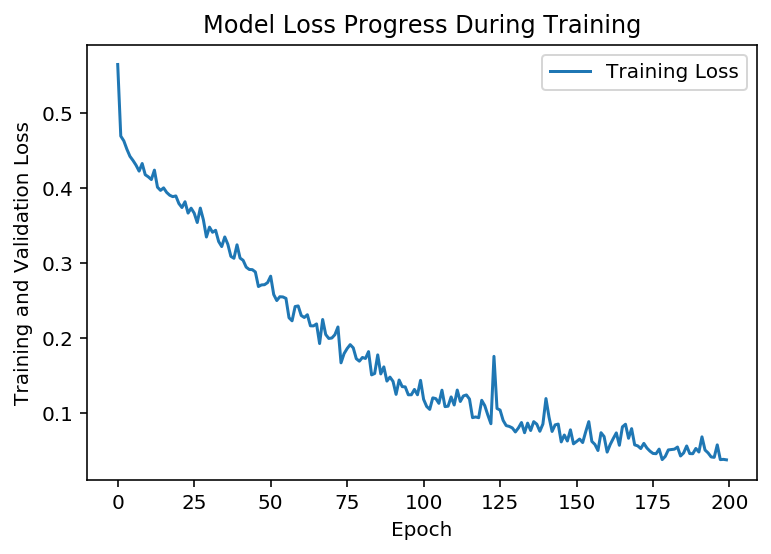

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

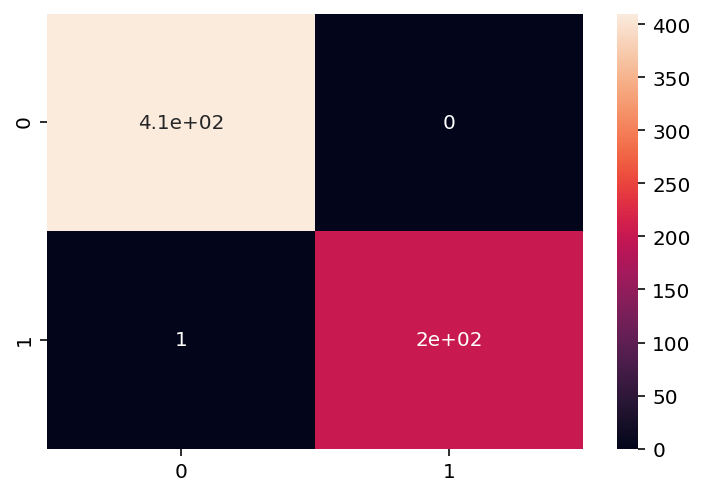

In [32]:
# Training set Performance
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       411
        True       1.00      1.00      1.00       203

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [34]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        90
           1       0.85      0.53      0.65        64

    accuracy                           0.77       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.78      0.77      0.75       154

